# **Viewing classes in Directory**





In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_example = "/content/drive/My Drive/Data"

classes = os.listdir(dir_example)
print(classes)

['Train', 'Test']


In [3]:
dir_example = "/content/drive/My Drive/Data/Train"

train_classes = os.listdir(dir_example)
print(train_classes)

['trash', 'cardboard', 'metal', 'plastic', 'paper', 'glass']


# **Visualizing Images in Dataset from each class**

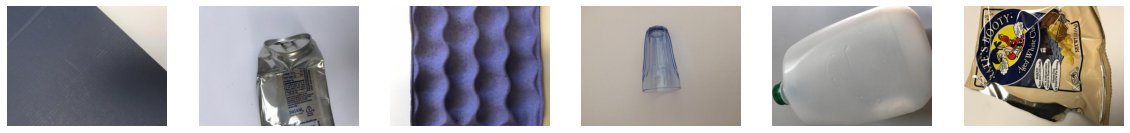

In [4]:
dir_with_examples = '/content/drive/My Drive/visualize'
files_per_row = 6
files_in_dir = os.listdir(dir_with_examples)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Generate the subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(20, 15, forward=True)

# Map each file to subplot
try:
  for i in range(0, len(files_in_dir)):
    file_name = files_in_dir[i]
    image = Image.open(f'{dir_with_examples}/{file_name}')
    row = math.floor(i / files_per_row)
    col = i % files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
except:
  pass
# Show the plot
plt.show()

# **Importing required Libraries for Model**

In [5]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Data Configuration**

In [6]:
train = '/content/drive/My Drive/Data/Train'
test = '/content/drive/My Drive/Data/Test'

# **Data Preparation and Loading**

### *Creating a Generator for Training Set*

In [7]:

train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      class_mode = 'sparse')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2184 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


### *Creating a Generator for Testing Set*

In [8]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    class_mode = 'sparse')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 343 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [12]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape


((32, 300, 300, 3), (32,))

In [13]:
for image_batch, label_batch in test_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

# **Writing the labels into a text file '*Labels.txt* '**

In [9]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


# **Model Architecture**

In [10]:
model=Sequential()

#Convolution blocks
model.add(Conv2D(32, kernel_size = (3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(64, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(32, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43808)             0

# **Model Compilation**

In [11]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# **Training the Model (batch_size = 32, epochs = 10)**

In [13]:
model.fit_generator(train_generator,
          epochs=10,
          steps_per_epoch=2184//32)

Epoch 1/10
68/68 [==============================] - 597s 9s/step - loss: 1.7161 - accuracy: 0.2621
Epoch 2/10
68/68 [==============================] - 284s 4s/step - loss: 1.6469 - accuracy: 0.3067
Epoch 3/10
68/68 [==============================] - 281s 4s/step - loss: 1.5410 - accuracy: 0.3685
Epoch 4/10
68/68 [==============================] - 281s 4s/step - loss: 1.4043 - accuracy: 0.4368
Epoch 5/10
68/68 [==============================] - 284s 4s/step - loss: 1.2660 - accuracy: 0.4898
Epoch 6/10
68/68 [==============================] - 282s 4s/step - loss: 1.1593 - accuracy: 0.5502
Epoch 7/10
68/68 [==============================] - 285s 4s/step - loss: 1.0183 - accuracy: 0.6008
Epoch 8/10
68/68 [==============================] - 282s 4s/step - loss: 0.9298 - accuracy: 0.6482
Epoch 9/10
68/68 [==============================] - 288s 4s/step - loss: 0.7860 - accuracy: 0.7059
Epoch 10/10
68/68 [==============================] - 285s 4s/step - loss: 0.7000 - accuracy: 0.7454


# **Testing Predictions**

Probability: 0.5401008
Classified: metal 



Text(0.5, 1.0, 'Loaded Image')

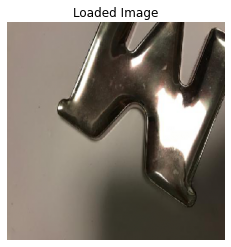

In [14]:
from keras.preprocessing import image
import numpy as np
test_img = '/content/drive/My Drive/Data/Test/metal/metal363.jpg'
img = image.load_img(test_img, target_size = (300,300))
img = image.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [15]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 4.34 %
GLASS : 26.04 %
METAL : 54.01 %
PAPER : 12.18 %
PLASTIC : 1.14 %
TRASH : 2.29 %


Probability: 0.9263525
Classified: glass 



Text(0.5, 1.0, 'Loaded Image')

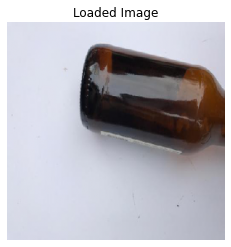

In [16]:
test_img = '/content/drive/My Drive/Data/Test/glass/glass421.jpg'
img = image.load_img(test_img, target_size = (300,300))
img = image.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [17]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 0.0 %
GLASS : 92.64 %
METAL : 6.57 %
PAPER : 0.23 %
PLASTIC : 0.56 %
TRASH : 0.0 %


Probability: 0.9705006
Classified: plastic 



Text(0.5, 1.0, 'Loaded Image')

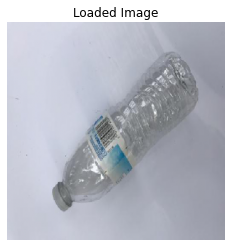

In [18]:
test_img = '/content/drive/My Drive/Data/Test/plastic/plastic425.jpg'
img = image.load_img(test_img, target_size = (300,300))
img = image.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [19]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 0.22 %
GLASS : 2.47 %
METAL : 0.21 %
PAPER : 0.04 %
PLASTIC : 97.05 %
TRASH : 0.0 %


### *Testing shows that the model is fairly successful in classifying the type of waste*

## ***Saving model as 'model.h5'***

In [20]:
model.save('weights/model.h5')